# NETFLIX data Anaysis
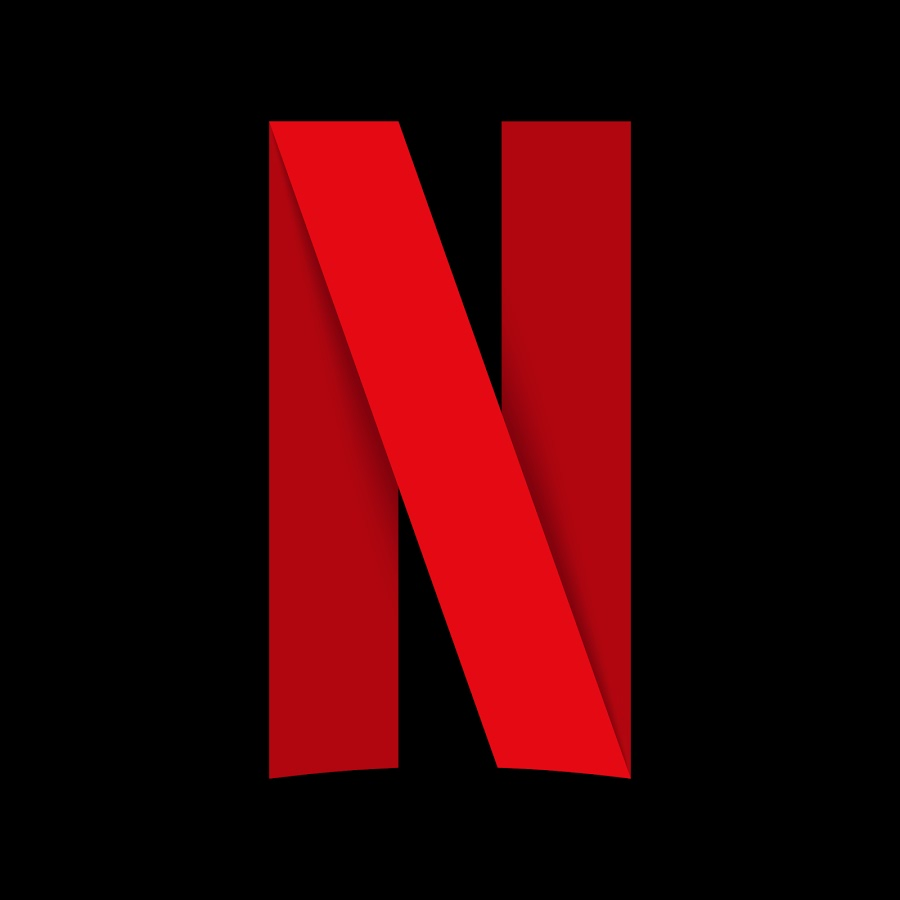

we are provided with the data of various TV shows available on netflix in thich we are asked to find the prediction of how many people actually finished the series.

In [284]:
import pandas as pd
df=pd.read_csv("C:\\Users\\HP PC\\Documents\\Clean Data.csv")
df.head()

,User ID,Day Of Week,Unnamed: 2,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,117752,12-02-2019,Tuesday,Stranger Things,2,6,51,Female,1,1,nan,nan,nan
1,28615,12-02-2019,Tuesday,Stranger Things,2,6,2,Female,0,0,nan,nan,nan
2,72226,12-02-2019,Tuesday,Stranger Things,2,3,5,Female,0,1,nan,nan,nan
3,62565,09-02-2019,Saturday,Stranger Things,2,10,59,Female,1,1,nan,nan,nan
4,3494,12-02-2019,Tuesday,Stranger Things,2,1,33,Female,1,0,nan,nan,nan


In [285]:
df=df.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','User ID','Day Of Week'])
df=df.rename(columns = {"Unnamed: 2":"Days of week"})
df.head()

,Days of week,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,Tuesday,Stranger Things,2,6,51,Female,1,1
1,Tuesday,Stranger Things,2,6,2,Female,0,0
2,Tuesday,Stranger Things,2,3,5,Female,0,1
3,Saturday,Stranger Things,2,10,59,Female,1,1
4,Tuesday,Stranger Things,2,1,33,Female,1,0


In [286]:
df["Completed"]=pd.to_numeric(df["Completed"])
df.dtypes

Days of week     object
Show             object
Season            int64
Episode           int64
Time Watched      int64
Gender           object
Completed       float64
Time of Day       int64
dtype: object

In [287]:
df.isnull().sum()

Days of week     0
Show             0
Season           0
Episode          0
Time Watched     0
Gender          99
Completed       38
Time of Day      0
dtype: int64

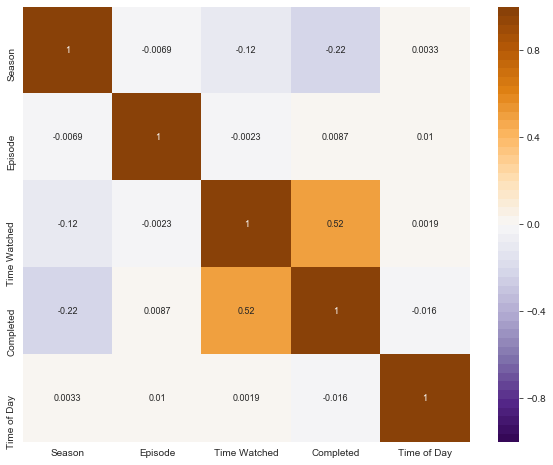

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 9}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)

C:\Users\HP PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


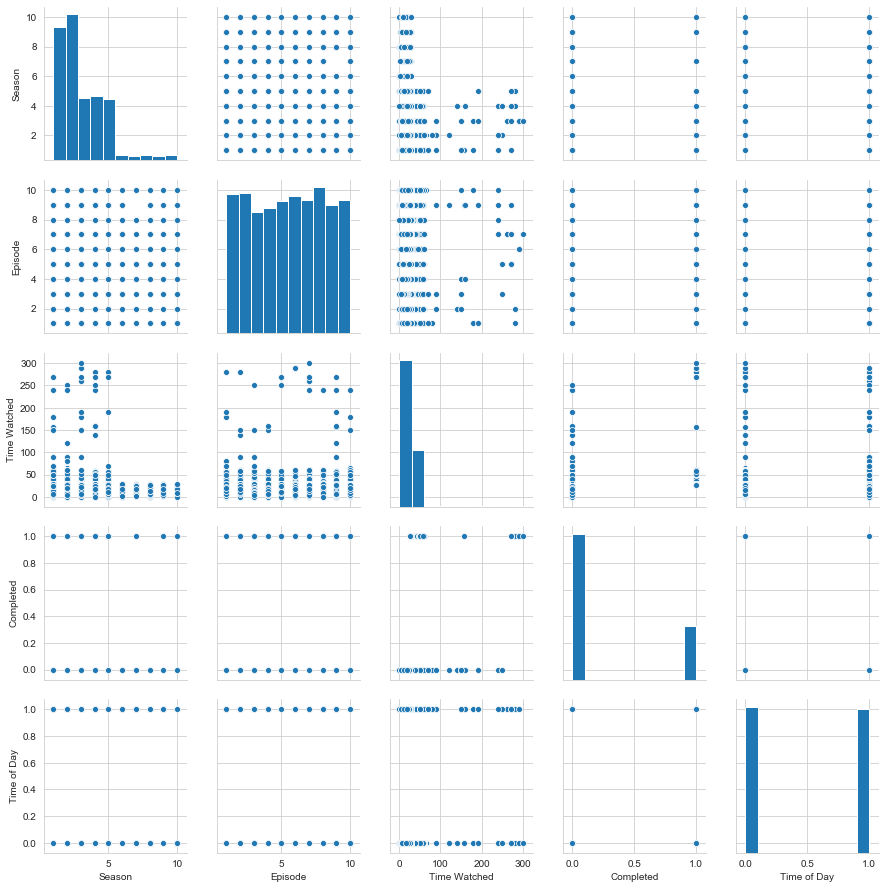

In [289]:
sns.pairplot(df)

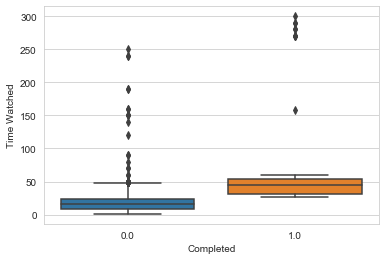

In [290]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Completed', y = 'Time Watched', data = df) 

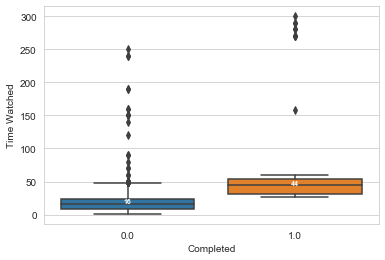

In [291]:
import numpy as np
sns.set_style("whitegrid")

box_plot = sns.boxplot(x="Completed",y="Time Watched",data=df)  #y_lim=(np.min(y_values),np.max(y_values)))

medians = df.groupby(['Completed'])['Time Watched'].median()
vertical_offset = df['Time Watched'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [292]:
df.groupby("Time Watched").Completed.max()

Time Watched
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      1
27      1
28      1
29      1
30      1
       ..
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
66    nan
70      0
80      0
90      0
120     0
140     0
150     0
158     1
160     0
180   nan
190     0
240     0
250     0
260   nan
270     1
280     1
290     1
300     1
Name: Completed, Length: 78, dtype: float64

# Missing values imputation
we found that there is strong correlation between completed and Time watched. So after using boxplot to understand the data we can clearly see that the people who watched the series less then 30 times did not complete the series wereas people who watched the series more than 30 times had a recod of completing the series. Based on this analysis we imputed the values.

In [293]:
for i in range(0,len(df)):
    if df["Time Watched"][i]>=30 and pd.isna(df["Completed"][i])==True:
        df["Completed"].fillna(1,inplace=True)
    else:
        df["Completed"].fillna(0,inplace=True)

In [294]:
df.isnull().sum()

Days of week     0
Show             0
Season           0
Episode          0
Time Watched     0
Gender          99
Completed        0
Time of Day      0
dtype: int64

## Using label encoder to convert categorical variables in to numerical values

In [295]:
from sklearn.preprocessing import LabelEncoder
#df_temp = df.astype("str").apply(LabelEncoder().fit_transform)
#df_final = df_temp.where(~df.isna(), df)
labelencoder = LabelEncoder()
df['Days of week']=labelencoder.fit_transform(df['Days of week'])
df['Show']=labelencoder.fit_transform(df['Show'])

In [296]:
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0

df.head()

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Days of week,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,3,4,2,6,51,0,1,1
1,3,4,2,6,2,0,0,0
2,3,4,2,3,5,0,0,1
3,1,4,2,10,59,0,1,1
4,3,4,2,1,33,0,1,0


In [306]:
pd.options.display.float_format = '{:,.0f}'.format
df=df.dropna()
df.head()

,Days of week,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,3,4,2,6,51,0,1,1
1,3,4,2,6,2,0,0,0
2,3,4,2,3,5,0,0,1
3,1,4,2,10,59,0,1,1
4,3,4,2,1,33,0,1,0


## Spliting the dataset into training and test set and Applying Logistic Regression


In [324]:
from sklearn.model_selection import train_test_split
x=df.drop('Completed',axis=1)
y=df.iloc[:,6]
X = x.apply(pd.to_numeric, errors='coerce')
Y = y.apply(pd.to_numeric, errors='coerce')
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [336]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
y_pred = logreg.predict(xTest)

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[619  31]
 [ 63 168]]


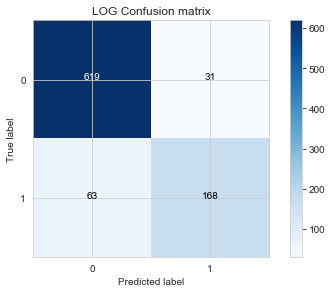

In [342]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
confusion_matrix = confusion_matrix(yTest, y_pred)
print(confusion_matrix)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()


### Checking the precision, recall and F-score for the model

In [327]:
from sklearn.metrics import classification_report
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       650
         1.0       0.88      0.72      0.79       231

    accuracy                           0.90       881
   macro avg       0.89      0.84      0.86       881
weighted avg       0.90      0.90      0.90       881



In [335]:
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression: ',accuracy_score(yTest, y_pred))

Accuracy of logistic regression:  0.9001135073779796


We calculated the confusion matrix in which we can see that around [31,63] values were predicted wrong.After applying logistic regression we received an accuracy of arounfd 90% 